In [595]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [596]:
X_full = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')

In [597]:
X_full.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [598]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [599]:
X_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

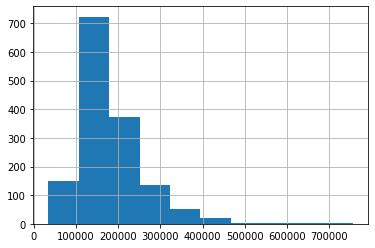

In [600]:
X_full['SalePrice'].hist()

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

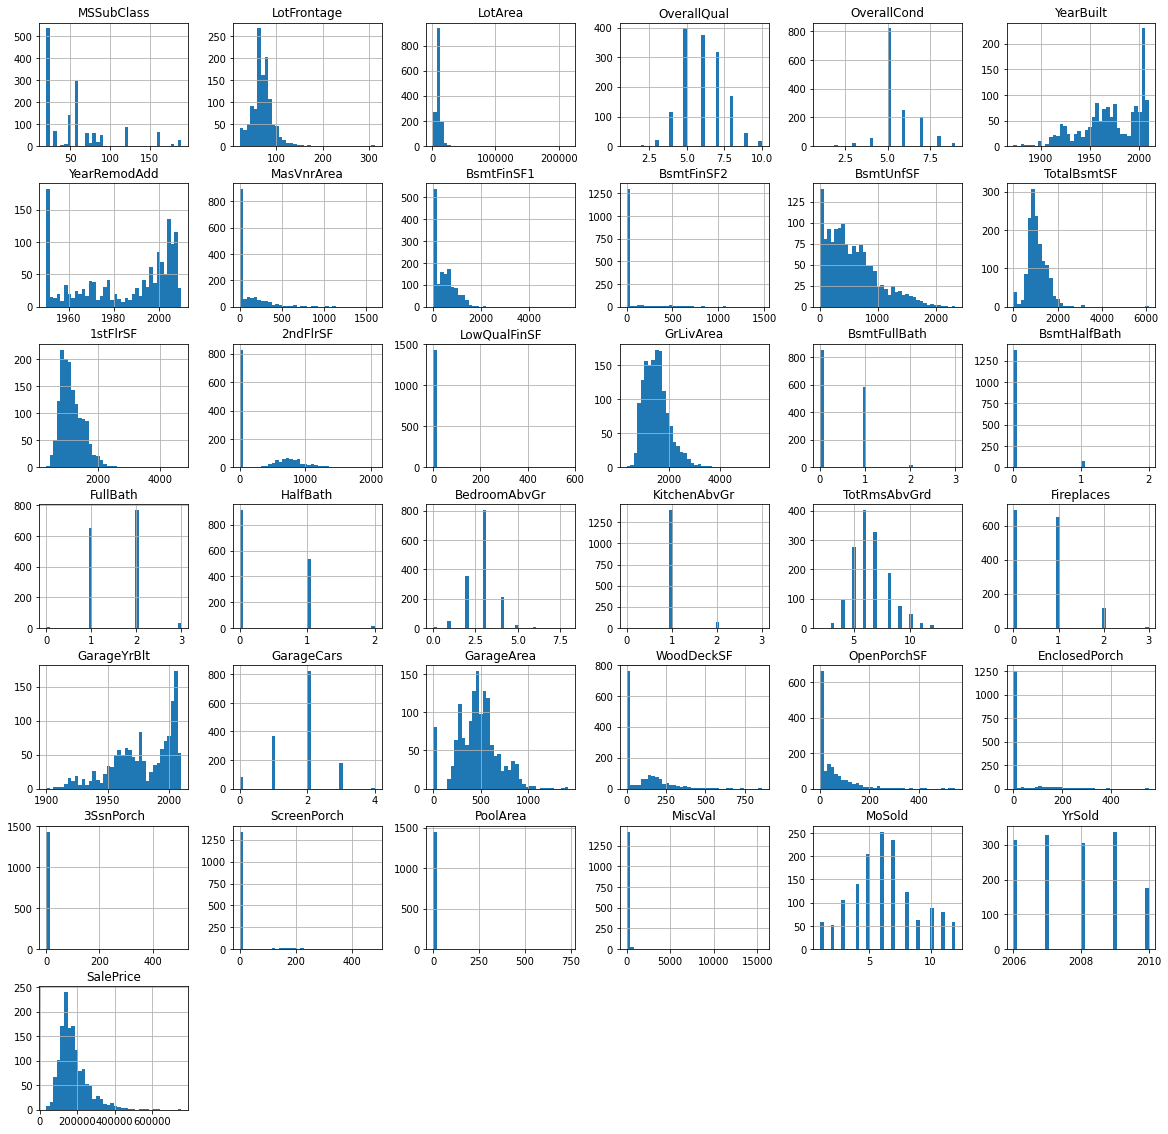

In [601]:
X_full.hist(bins=int(np.sqrt(len(X_full))),figsize=(20,20))

In [602]:
X_full.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:>

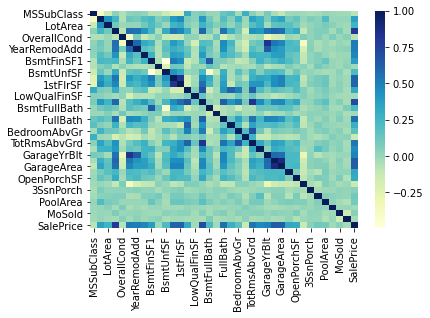

In [603]:
import seaborn as sns
sns.heatmap(X_full.corr(),cmap="YlGnBu")

In [604]:
features_NA=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']

In [605]:
X_full['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [606]:
from sklearn.impute import SimpleImputer
imp_none = SimpleImputer( missing_values=np.nan,strategy='constant',fill_value='None')
df_concat=imp_none.fit_transform(X_full[features_NA])
X_full[features_NA]=df_concat


In [607]:
X_full['Alley'].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [608]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,NaN,0,12,2008,WD,Normal,250000


In [609]:
X_full[['MiscFeature']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MiscFeature  54 non-null     object
dtypes: object(1)
memory usage: 22.8+ KB


In [610]:
features_with_large_nans=X_full.columns[X_full.isna().mean()*100>5]

In [611]:
features_with_large_nans

Index(['LotFrontage', 'GarageYrBlt', 'MiscFeature'], dtype='object')

In [612]:
X_full.drop(features_with_large_nans,axis=1,inplace=True)

In [613]:
features_one_hot=['Alley','MSZoning','LandContour','Neighborhood','LandSlope','HouseStyle','RoofMatl','Exterior1st','MasVnrType','Foundation','BsmtFinType1','BsmtFinType2','Heating','GarageType','SaleType','SaleCondition','Condition1','Condition2','RoofStyle','CentralAir','BldgType','Functional','Exterior2nd','LotConfig']

In [614]:
Nans_features=X_full[features_one_hot].columns[X_full[features_one_hot].isna().any()].tolist()
Nans_features

['MasVnrType']

In [615]:
imp = SimpleImputer(strategy='most_frequent')
df_concat=(imp.fit_transform(X_full[Nans_features]))
X_full[Nans_features]=df_concat


In [616]:
X_full[Nans_features].isna().any()

MasVnrType    False
dtype: bool

In [617]:
from sklearn.preprocessing import OneHotEncoder
en=OneHotEncoder(sparse=False)
for feat in features_one_hot :
    one_hot=en.fit_transform(X_full[feat].values.reshape(-1,1))
    dff=pd.DataFrame(one_hot,columns=en.categories_,index=X_full.index)
    X_full[en.categories_[0]]=dff
    X_full.drop(feat,axis=1,inplace=True)
    



In [618]:
features_ordinal_enc=['LotShape','Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Electrical','Fence','Street','PavedDrive']

In [619]:
X_full[features_ordinal_enc].isnull().any()

LotShape        False
Utilities       False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
HeatingQC       False
KitchenQual     False
FireplaceQu     False
GarageFinish    False
GarageQual      False
GarageCond      False
PoolQC          False
Electrical       True
Fence           False
Street          False
PavedDrive      False
dtype: bool

In [620]:

Nans_features=['BsmtQual','BsmtCond','BsmtExposure','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Electrical','Fence']
imp = SimpleImputer(strategy='most_frequent')
df_concat=imp.fit_transform(X_full[Nans_features])
X_full[Nans_features]=df_concat

In [621]:
X_full[Nans_features].isna().any()

BsmtQual        False
BsmtCond        False
BsmtExposure    False
FireplaceQu     False
GarageFinish    False
GarageQual      False
GarageCond      False
PoolQC          False
Electrical      False
Fence           False
dtype: bool

In [622]:
X_full['LotShape']=X_full['LotShape'].map({"IR3":0,'IR2':1,
                        'IR1':2,'Reg':3})
X_full['Utilities']=X_full['Utilities'].map({"ELO":0,"NoSeWa":1
                         ,"NoSewr":2,"AllPub":3})
X_full['ExterQual']=X_full['ExterQual'].map({'Po':0,'Fa':1,'TA':2
                         ,'Gd':3,'Ex':4})
X_full['ExterCond']=X_full['ExterCond'].map({'Po':0,'Fa':1,'TA':2
                         ,'Gd':3,'Ex':4})
X_full['BsmtQual']=X_full['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3
                         ,'Gd':4,'Ex':5})
X_full['BsmtCond']=X_full['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3
                         ,'Gd':4,'Ex':5})
X_full['BsmtExposure']=X_full['BsmtExposure'].map({'None':0 ,"No":1,"Mn":2,"Av":3,'Gd':4 })

X_full['HeatingQC']=X_full['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3
                         ,'Gd':4,'Ex':5})
X_full['KitchenQual']=X_full['KitchenQual'].map({'Po':0,'Fa':1,'TA':2
                         ,'Gd':3,'Ex':4})

X_full['FireplaceQu']=X_full['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3
                         ,'Gd':4,'Ex':5})

X_full['GarageFinish']=X_full['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})

X_full['GarageQual']=X_full['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3
                         ,'Gd':4,'Ex':5})
X_full['GarageCond']=X_full['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3
                         ,'Gd':4,'Ex':5})
X_full['PoolQC']=X_full['PoolQC'].map({'None':0,'Po':1,'Fa':2,'TA':3
                         ,'Gd':4,'Ex':5})
X_full['Electrical']=X_full['Electrical'].map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,"Mix":0 })
X_full['Fence']=X_full['Fence'].map({'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4
                                    })
X_full['Street']=X_full['Street'].map({'Grvl':0 , 'Pave':1})
X_full['PavedDrive']=X_full['PavedDrive'].map({'N':0,'P':1,'Y':2})

In [623]:
X_full

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Typ,Brk Cmn,CmentBd,Other,Wd Shng,Corner,CulDSac,FR2,FR3,Inside
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,1,3,3,7,5,2003,2003,196.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20,9600,1,3,3,6,8,1976,1976,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60,11250,1,2,3,7,5,2001,2002,162.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,70,9550,1,2,3,7,5,1915,1970,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,60,14260,1,2,3,8,5,2000,2000,350.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,1,3,3,6,5,1999,2000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,20,13175,1,3,3,6,6,1978,1988,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1458,70,9042,1,3,3,7,9,1941,2006,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [624]:
X_full.columns[X_full.isna().any()].tolist()

['MasVnrArea']

In [625]:
X_full[['MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MasVnrArea  1452 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


<AxesSubplot:>

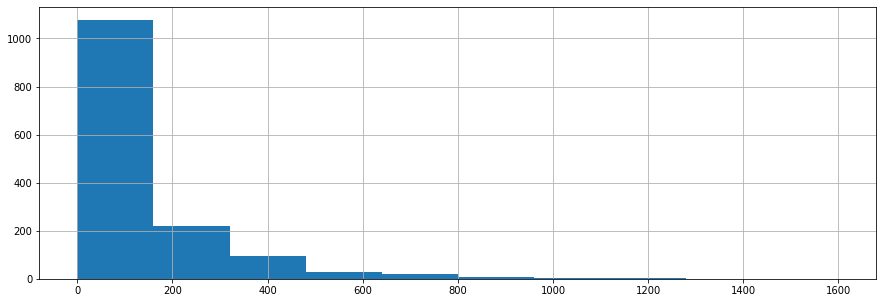

In [626]:
X_full['MasVnrArea'].hist(figsize=(15,5))

In [627]:
X_full['MasVnrArea'].fillna(X_full['MasVnrArea'].median(),inplace=True)

In [628]:
y=X_full['SalePrice']
X=X_full.drop('SalePrice',axis=1)

In [629]:
X

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Typ,Brk Cmn,CmentBd,Other,Wd Shng,Corner,CulDSac,FR2,FR3,Inside
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,1,3,3,7,5,2003,2003,196.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20,9600,1,3,3,6,8,1976,1976,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60,11250,1,2,3,7,5,2001,2002,162.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,70,9550,1,2,3,7,5,1915,1970,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,60,14260,1,2,3,8,5,2000,2000,350.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,1,3,3,6,5,1999,2000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,20,13175,1,3,3,6,6,1978,1988,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1458,70,9042,1,3,3,7,9,1941,2006,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [630]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [631]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [632]:
preds=lr.predict(X_test)

In [633]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.log(y_test),np.log(preds))

0.03007478180244276

In [670]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
preds=rf.predict(X_test)

In [671]:
mean_squared_error(np.log(y_test),np.log(preds))

0.020054550230248786

In [682]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [683]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [684]:

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [685]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [687]:
rff=rf_random.best_estimator_
preds=rff.predict(X_test)
mean_squared_error(np.log(y_test),np.log(preds))

0.020354329553025168

In [676]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
preds=reg.predict(X_test)

In [677]:
mean_squared_error(np.log(y_test),np.log(preds))

0.018367980803176247

In [693]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [694]:
preds=model.predict(X_test)
mean_squared_error(np.log(y_test),np.log(preds))

0.01790248818562999

In [634]:
def preprocessing(X_full):
    features_NA=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
    from sklearn.impute import SimpleImputer
    imp_none = SimpleImputer( strategy='constant',fill_value='None')
    df_concat=imp_none.fit_transform(X_full[features_NA])
    X_full[features_NA]=df_concat

    
    X_full.drop(['LotFrontage', 'GarageYrBlt', 'MiscFeature'],axis=1,inplace=True)
    
    
    
    
    features_one_hot=['Alley','MSZoning','LandContour','Neighborhood','LandSlope','HouseStyle','RoofMatl','Exterior1st','MasVnrType','Foundation','BsmtFinType1','BsmtFinType2','Heating','GarageType','SaleType','SaleCondition','Condition1','Condition2','RoofStyle','CentralAir','BldgType','Functional','Exterior2nd','LotConfig']
    Nans_features=X_full[features_one_hot].columns[X_full[features_one_hot].isna().any()].tolist()
    imp = SimpleImputer(strategy='most_frequent')
    df_concat=imp.fit_transform(X_full[Nans_features])
    X_full[Nans_features]=df_concat
    
    
    
    en=OneHotEncoder(sparse=False)
    for feat in features_one_hot :
        one_hot=en.fit_transform(X_full[feat].values.reshape(-1,1))
        dff=pd.DataFrame(one_hot,columns=en.categories_,index=X_full.index)
        X_full[en.categories_[0]]=dff
        X_full.drop(feat,axis=1,inplace=True)
    
    
    
    features_ordinal_enc=['LotShape','Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Electrical','Fence','Street','PavedDrive']
    Nans_features=X_full[features_ordinal_enc].columns[X_full[features_ordinal_enc].isna().any()].tolist()
    imp = SimpleImputer(strategy='most_frequent')
    df_concat=imp.fit_transform(X_full[Nans_features])
    X_full[Nans_features]=df_concat
    
    
    X_full['LotShape']=X_full['LotShape'].map({"IR3":0,'IR2':1,
                            'IR1':2,'Reg':3})
    X_full['Utilities']=X_full['Utilities'].map({"ELO":0,"NoSeWa":1
                             ,"NoSewr":2,"AllPub":3})
    X_full['ExterQual']=X_full['ExterQual'].map({'Po':0,'Fa':1,'TA':2
                             ,'Gd':3,'Ex':4})
    X_full['ExterCond']=X_full['ExterCond'].map({'Po':0,'Fa':1,'TA':2
                             ,'Gd':3,'Ex':4})
    X_full['BsmtQual']=X_full['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3
                             ,'Gd':4,'Ex':5})
    X_full['BsmtCond']=X_full['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3
                             ,'Gd':4,'Ex':5})
    X_full['BsmtExposure']=X_full['BsmtExposure'].map({'None':0 ,"No":1,"Mn":2,"Av":3,'Gd':4 })

    X_full['HeatingQC']=X_full['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3
                             ,'Gd':4,'Ex':5})
    X_full['KitchenQual']=X_full['KitchenQual'].map({'Po':0,'Fa':1,'TA':2
                             ,'Gd':3,'Ex':4})

    X_full['FireplaceQu']=X_full['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3
                             ,'Gd':4,'Ex':5})

    X_full['GarageFinish']=X_full['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})

    X_full['GarageQual']=X_full['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3
                             ,'Gd':4,'Ex':5})
    X_full['GarageCond']=X_full['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3
                             ,'Gd':4,'Ex':5})
    X_full['PoolQC']=X_full['PoolQC'].map({'None':0,'Po':1,'Fa':2,'TA':3
                             ,'Gd':4,'Ex':5})
    X_full['Electrical']=X_full['Electrical'].map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,"Mix":0 })
    X_full['Fence']=X_full['Fence'].map({'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4
                                        })
    X_full['Street']=X_full['Street'].map({'Grvl':0 , 'Pave':1})
    X_full['PavedDrive']=X_full['PavedDrive'].map({'N':0,'P':1,'Y':2})
    
    X_full['MasVnrArea'].fillna(X_full['MasVnrArea'].median(),inplace=True)
    return X_full
    
    


In [635]:
X_test_full=preprocessing(X_test_full)

In [640]:
X_test_full.columns[X_test_full.isna().any()].tolist()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [660]:
X_test_full['GarageArea'].fillna(X_test_full['GarageArea'].median(),inplace=True)
X_test_full['GarageCars'].fillna(X_test_full['GarageCars'].median(),inplace=True)
X_test_full['BsmtHalfBath'].fillna(X_test_full['BsmtHalfBath'].median(),inplace=True)
X_test_full['BsmtFullBath'].fillna(X_test_full['BsmtFullBath'].median(),inplace=True)
X_test_full['TotalBsmtSF'].fillna(X_test_full['TotalBsmtSF'].median(),inplace=True)
X_test_full['BsmtUnfSF'].fillna(X_test_full['BsmtUnfSF'].median(),inplace=True)
X_test_full['BsmtFinSF2'].fillna(X_test_full['BsmtFinSF2'].median(),inplace=True)
X_test_full['BsmtFinSF1'].fillna(X_test_full['BsmtFinSF1'].median(),inplace=True)

In [661]:
missing_features=list(set(X_train.columns)-set(X_test_full.columns))

In [662]:
X_test_full[missing_features]=0

In [695]:
test_preds=model.predict(X_test_full)

In [696]:
result=pd.DataFrame(test_preds,index=X_test_full.index)
result.columns=['SalePrice']
result

,SalePrice
Id,
1461,122508.093750
1462,145731.171875
1463,179946.859375
1464,194475.390625
1465,195269.343750
...,...
2915,84121.179688
2916,88996.929688
2917,157644.859375


In [697]:
result.to_csv("result.csv")